In [2]:
from torch import nn
import numpy as np
import torch
from tqdm import tqdm as tqdm

from data.loaders import load_cifar10
from torch.utils.data import TensorDataset, DataLoader
from models.vgg import VGG_A, VGG_A_BatchNorm
import re 
import os 

num_workers = 2
batch_size = 128

device = torch.device("cuda:{}".format(4) if torch.cuda.is_available() else "cpu")

train_data, train_labels, test_data, test_labels = load_cifar10("/home/user79/PJ/CIFAR-10/data/cifar-10-batches-py")  
valid_data = train_data[:10000]
valid_labels = train_labels[:10000]
train_data = train_data[10000:]
train_labels = train_labels[10000:]
train_loader = DataLoader(TensorDataset(train_data, train_labels), batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(TensorDataset(valid_data, valid_labels), batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = DataLoader(TensorDataset(test_data, test_labels), batch_size=batch_size, shuffle=False, num_workers=num_workers)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input shape: torch.Size([128, 3, 32, 32]), Labels shape: torch.Size([128])
Sample label: 6


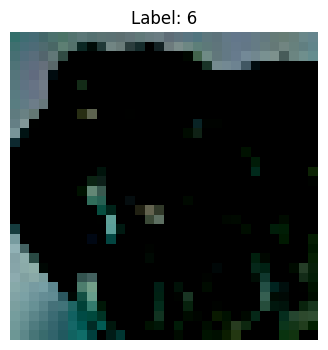

In [6]:
# Initialize your data loader and make sure that dataloader works as expected by observing one sample from it.
import matplotlib.pyplot as plt

for X, y in train_loader:
    print(f"Input shape: {X.shape}, Labels shape: {y.shape}")
    print(f"Sample label: {y[0]}")

    first_image = X[0].permute(1, 2, 0).cpu().numpy() 
    first_label = y[0].item()  
    plt.figure(figsize=(4, 4))
    plt.imshow(first_image)
    plt.title(f"Label: {first_label}")
    plt.axis('off')
    plt.show()
    break

## Run VGG_Loss_Landscape.py to draw the loss landscape

In [3]:
!python /home/user79/PJ/VGG_BatchNorm/VGG_Loss_Landscape.py

cuda:4
NVIDIA GeForce RTX 3090
Input shape: torch.Size([128, 3, 32, 32]), Labels shape: torch.Size([128])
Sample label: 0
Training VGG-A models...

Training VGG_A with lr=0.001
  0%|                                                 | 0/20 [00:00<?, ?epoch/s]
Epoch 1/20, Loss: 1.9053, Train Acc: 34.88%, Val Acc: 35.28%, Best Val Acc: 35.28% at Epoch 1
  5%|██                                       | 1/20 [00:14<04:40, 14.75s/epoch]
Epoch 2/20, Loss: 1.4242, Train Acc: 56.02%, Val Acc: 55.01%, Best Val Acc: 55.01% at Epoch 2
 10%|████                                     | 2/20 [00:26<03:55, 13.11s/epoch]
Epoch 3/20, Loss: 1.1042, Train Acc: 68.14%, Val Acc: 65.43%, Best Val Acc: 65.43% at Epoch 3
 15%|██████▏                                  | 3/20 [00:38<03:35, 12.70s/epoch]
Epoch 4/20, Loss: 0.8847, Train Acc: 73.91%, Val Acc: 69.91%, Best Val Acc: 69.91% at Epoch 4
 20%|████████▏                                | 4/20 [00:51<03:21, 12.58s/epoch]
Epoch 5/20, Loss: 0.7444, Train Acc: 78.83

In [ ]:
from VGG_Loss_Landscape import get_accuracy
from models.vgg import VGG_A, VGG_A_BatchNorm 

models_dir = "/home/user79/PJ/VGG_BatchNorm/PJ/VGG_BatchNorm/reports/models" 
model_pattern = re.compile(r'(VGG_A|VGG_A_BatchNorm)_lr_(\d+\.\d+)\.pth')

# get all the model 
model_files = []
for filename in os.listdir(models_dir):
    if filename.endswith('.pth'):
        match = model_pattern.match(filename)
        if match:
            model_files.append(filename)

model_files.sort()

# sort them by the name
for filename in model_files:
    model_path = os.path.join(models_dir, filename)
    
    # know which model it is 
    match = model_pattern.match(filename)
    model_type = match.group(1)
    
    # initial
    model = VGG_A() if model_type == 'VGG_A' else VGG_A_BatchNorm()
    
    # calculate the accuracy 
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    test_acc = get_accuracy(model, test_loader, device)
    
    print(f"Model: {filename}, Test Accuracy: {test_acc:.2f}%")

Model: VGG_A_BatchNorm_lr_0.0001.pth, Test Accuracy: 73.74%
Model: VGG_A_BatchNorm_lr_0.0005.pth, Test Accuracy: 81.08%
Model: VGG_A_BatchNorm_lr_0.001.pth, Test Accuracy: 81.68%
Model: VGG_A_BatchNorm_lr_0.002.pth, Test Accuracy: 81.13%
Model: VGG_A_lr_0.0001.pth, Test Accuracy: 74.78%
Model: VGG_A_lr_0.0005.pth, Test Accuracy: 76.90%
Model: VGG_A_lr_0.001.pth, Test Accuracy: 74.70%
Model: VGG_A_lr_0.002.pth, Test Accuracy: 71.40%


## Run VGG_BN_compare.py to compare loss and accuracy of VGG with/without BN in the same plot

In [ ]:
!python /home/user79/PJ/VGG_BatchNorm/VGG_BN_compare.py

cuda:4
NVIDIA GeForce RTX 3090
Input shape: torch.Size([128, 3, 32, 32]), Labels shape: torch.Size([128])
Sample label: 6

Training VGG_A with learning rate 0.0005...
  0%|                                                 | 0/20 [00:00<?, ?epoch/s]
Epoch 1/20, Loss: 1.7488, Train Accuracy: 46.64%, Val Accuracy: 46.08%, Best Val Accuracy: 46.08% at Epoch 1
  5%|██                                       | 1/20 [00:10<03:27, 10.92s/epoch]
Epoch 2/20, Loss: 1.2392, Train Accuracy: 63.89%, Val Accuracy: 61.72%, Best Val Accuracy: 61.72% at Epoch 2
 10%|████                                     | 2/20 [00:25<03:59, 13.28s/epoch]
Epoch 3/20, Loss: 0.9432, Train Accuracy: 74.31%, Val Accuracy: 69.21%, Best Val Accuracy: 69.21% at Epoch 3
 15%|██████▏                                  | 3/20 [00:42<04:09, 14.68s/epoch]
Epoch 4/20, Loss: 0.7283, Train Accuracy: 78.71%, Val Accuracy: 72.24%, Best Val Accuracy: 72.24% at Epoch 4
 20%|████████▏                                | 4/20 [00:55<03:43, 13.96s

## Run VGG_dropout_Loss_Landscape.py to draw the loss landscape

In [ ]:
!python /home/user79/PJ/VGG_BatchNorm/VGG_dropout_Loss_Landscape.py

cuda:4
NVIDIA GeForce RTX 3090
Input shape: torch.Size([128, 3, 32, 32]), Labels shape: torch.Size([128])
Sample label: 3
Training VGG-A-Dropout models...

Training VGG_A_Dropout with lr=0.001
  0%|                                                 | 0/20 [00:00<?, ?epoch/s]
Epoch 1/20, Loss: 1.9615, Train Acc: 32.97%, Val Acc: 32.99%, Best Val Acc: 32.99% at Epoch 1
  5%|██                                       | 1/20 [00:14<04:41, 14.80s/epoch]
Epoch 2/20, Loss: 1.5367, Train Acc: 48.49%, Val Acc: 47.35%, Best Val Acc: 47.35% at Epoch 2
 10%|████                                     | 2/20 [00:30<04:39, 15.52s/epoch]
Epoch 3/20, Loss: 1.2529, Train Acc: 63.71%, Val Acc: 61.17%, Best Val Acc: 61.17% at Epoch 3
 15%|██████▏                                  | 3/20 [00:47<04:30, 15.91s/epoch]
Epoch 4/20, Loss: 1.0047, Train Acc: 70.51%, Val Acc: 66.99%, Best Val Acc: 66.99% at Epoch 4
 20%|████████▏                                | 4/20 [01:08<04:50, 18.15s/epoch]
Epoch 5/20, Loss: 0.8561, 